# GMSL Analysis and Prediction 

## Water Dataset (https://www.kaggle.com/mathsian/water-temperature)

Podaci u ovom skupu podataka predstavljaju uzorke vode sakupljene iz okeana između 1959. i 2020. godine. Uzećemo u obzir 
podatke prikupljane na dubinama do 200m (Photic).

Podaci koji su od interesa za naš rad su:
* T_degC - temperatura vode izražena u celzijusima 
* O2ml_L - zasićenost vode kiseonikom

In [45]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('original_datasets/water.csv', delimiter=',')

In [47]:
df.head()

,Sta_ID,Date,Quarter,Lat_Deg,Depthm,Zone,T_degC,PO4uM,SiO3uM,NO2uM,NO3uM,Salnty,O2ml_L
0,130.0 050.0,08/16/1959,3,25,0,Photic,25.38,0.36,1.0,0.0,0.9,34.150,4.72
1,130.0 050.0,08/16/1959,3,25,1,Photic,25.38,0.36,1.0,0.0,0.9,34.150,4.72
2,130.0 050.0,08/16/1959,3,25,10,Photic,25.35,0.41,1.0,0.0,0.8,34.180,4.14
3,130.0 050.0,08/16/1959,3,25,20,Photic,23.50,0.42,1.0,0.0,1.2,34.146,4.26
4,130.0 050.0,08/16/1959,3,25,30,Photic,21.45,0.43,1.0,0.0,1.5,34.117,4.57


In [48]:
df.columns

Index(['Sta_ID', 'Date', 'Quarter', 'Lat_Deg', 'Depthm', 'Zone', 'T_degC',
       'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM', 'Salnty', 'O2ml_L'],
      dtype='object')

In [49]:
df.std()

C:\Users\STEFAN~1\AppData\Local\Temp/ipykernel_12024/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Quarter      1.124341
Lat_Deg      2.069323
Depthm     214.807837
T_degC       3.820133
PO4uM        0.998076
SiO3uM      26.871026
NO2uM        0.102860
NO3uM       14.576561
Salnty       0.414828
O2ml_L       1.991083
dtype: float64

#### Uklanjanje kolona koje nisu od interesa i kod kojih je standardna devijacija mala. Kolone 'Depthm' i 'Zone' se ostavljaju radi daljih razmatranja.

* Depthm - dubina na kojoj je izvršeno merenje
* Zone - zona u kojoj je izvršeno merenje (Photic/Disphotic)

In [50]:
df.drop(['Sta_ID', 'Quarter', 'Lat_Deg', 'PO4uM',
         'NO2uM', 'Salnty'], axis = 1, inplace = True)

In [51]:
df.rename(columns={'T_degC':'WaterTemp', 'O2ml_L':'O2ml', 'SiO3uM':'SiO3', 'NO3uM':'NO3'}, inplace = True)

In [52]:
df.describe()

,Depthm,WaterTemp,SiO3,NO3,O2ml
count,337792.000000,337792.000000,337792.000000,337792.000000,337792.000000
mean,170.392887,11.185802,26.308965,17.234587,3.728877
std,214.807837,3.820133,26.871026,14.576561,1.991083
min,0.000000,1.480000,0.000000,-0.400000,-0.010000
25%,40.000000,8.200000,3.100000,0.600000,1.990000
50%,103.000000,10.450000,18.000000,18.000000,3.930000
75%,250.000000,14.170000,41.600000,30.000000,5.680000
max,5351.000000,30.020000,186.000000,95.000000,11.130000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337792 entries, 0 to 337791
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       337792 non-null  object 
 1   Depthm     337792 non-null  int64  
 2   Zone       337792 non-null  object 
 3   WaterTemp  337792 non-null  float64
 4   SiO3       337792 non-null  float64
 5   NO3        337792 non-null  float64
 6   O2ml       337792 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 18.0+ MB


#### Konvertovanje datuma iz stringa u datetime

In [54]:
df['Date'] = pd.to_datetime(df['Date'])

#### Uzimaju se u obzir podaci koji su prikupljani da dubinama do 200m (Photic) nakon čega se ta kolona briše

In [55]:
df = df[df['Zone'] == 'Photic']

In [56]:
df['Zone'].values

array(['Photic', 'Photic', 'Photic', ..., 'Photic', 'Photic', 'Photic'],
      dtype=object)

In [57]:
df.drop('Zone', axis = 1, inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236431 entries, 0 to 337791
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       236431 non-null  datetime64[ns]
 1   Depthm     236431 non-null  int64         
 2   WaterTemp  236431 non-null  float64       
 3   SiO3       236431 non-null  float64       
 4   NO3        236431 non-null  float64       
 5   O2ml       236431 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 12.6 MB


In [59]:
df.head()

,Date,Depthm,WaterTemp,SiO3,NO3,O2ml
0,1959-08-16,0,25.38,1.0,0.9,4.72
1,1959-08-16,1,25.38,1.0,0.9,4.72
2,1959-08-16,10,25.35,1.0,0.8,4.14
3,1959-08-16,20,23.50,1.0,1.2,4.26
4,1959-08-16,30,21.45,1.0,1.5,4.57


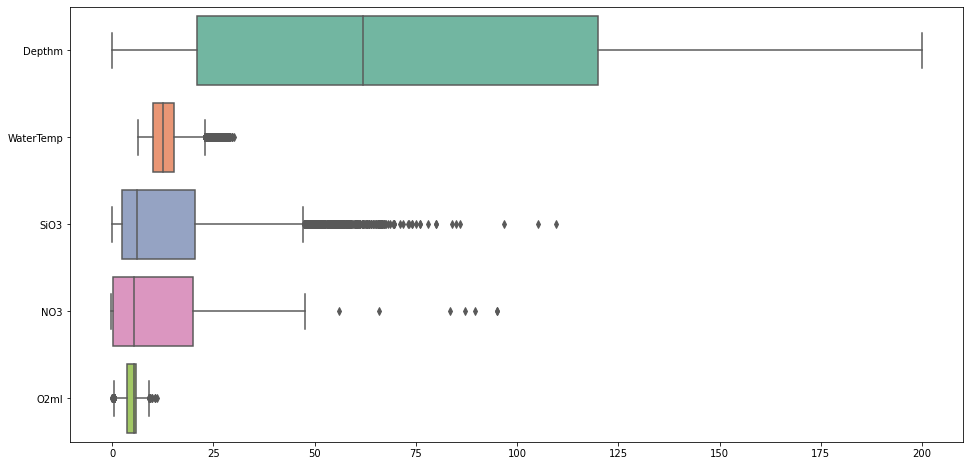

In [60]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sb.boxplot(data=df, orient="h", palette="Set2")

In [61]:
df.shape

(236431, 6)

In [62]:
df.nunique()

Date          3080
Depthm         201
WaterTemp    11518
SiO3          4251
NO3           3023
O2ml          5376
dtype: int64

#### Pošto skup podataka ima 236431 redova, a rezultat nunique vraća da postoji 3080 različitih Date zaključujemo da postoje duplikati. 

#### Izdvajanjem duplikata, može se primetiti da oni predstavljaju merenja u istom danu na različitim dubinama.

In [63]:
duplicate_dates = df.duplicated(subset=['Date'], keep=False)
df = df.loc[duplicate_dates.values]
df.head(20)

,Date,Depthm,WaterTemp,SiO3,NO3,O2ml
0,1959-08-16,0,25.38,1.0,0.9,4.72
1,1959-08-16,1,25.38,1.0,0.9,4.72
2,1959-08-16,10,25.35,1.0,0.8,4.14
3,1959-08-16,20,23.50,1.0,1.2,4.26
4,1959-08-16,30,21.45,1.0,1.5,4.57
5,1959-08-16,34,20.58,1.0,1.6,4.74
6,1959-08-16,44,19.94,1.0,1.2,4.69
7,1959-08-16,50,19.30,1.0,1.1,5.04
8,1959-08-16,58,18.36,1.0,1.0,5.39
9,1959-08-16,73,16.83,2.0,1.1,4.21


#### Grupisanjem po datumu i korišćenjem median metode, dobija se podatak o temperaturi vode i koncentraciji O2 za određeni dan.

In [64]:
df = df.groupby('Date')[['WaterTemp', 'O2ml', 'SiO3', 'NO3']].median().reset_index()

#### Nakon grupisanja izbačeni su duplikati i obrisane suvišne kolone

In [65]:
df.sort_values('Date').head(5)

,Date,WaterTemp,O2ml,SiO3,NO3
0,1959-08-16,18.360,4.210,1.0,1.50
1,1959-08-18,17.140,4.655,2.0,0.35
2,1959-08-19,16.640,5.120,2.0,0.60
3,1959-08-23,15.905,4.130,4.5,4.00
4,1959-08-26,16.950,3.765,4.7,3.40


#### Uzimamo u obzir datume od 1969. do 2013. godine

In [66]:
df = df[(df['Date'] >= '1969-01') & (df['Date'] <= '2014-02')]

In [67]:
df.head().append(df.tail())

,Date,WaterTemp,O2ml,SiO3,NO3
5,1969-01-08,11.5950,5.2050,8.400,8.15
6,1969-01-10,15.6300,5.6750,2.000,0.45
7,1969-01-11,13.4500,5.8500,2.750,0.10
8,1969-01-12,11.8000,4.9050,9.750,8.90
9,1969-01-15,13.0450,5.0250,5.550,6.65
2706,2013-11-25,16.1600,5.9560,1.400,0.20
2707,2014-01-29,13.8515,5.2720,4.735,3.20
2708,2014-01-30,12.3200,5.0765,6.805,7.80
2709,2014-01-31,13.6280,5.6750,3.110,1.00
2710,2014-02-01,14.9620,5.6040,2.580,0.10


#### Dodajemo datume koji nedostaju

In [68]:
df.set_index('Date', inplace = True)

In [69]:
idx = pd.date_range(start='1969-01', end='2014-02' , freq='M')
df_missing = df.reindex(idx, fill_value=None)

df = df.append(df_missing)

In [70]:
df.sort_index(inplace=True)

In [71]:
df.reset_index(inplace = True)

In [72]:
df.rename(columns={'index':'Date'}, inplace = True)

In [73]:
df['Date'] = pd.to_datetime(df['Date'])

In [74]:
df['Date'] = df['Date'].dt.strftime('%Y-%m')

#### Kako bi se dobili podaci za određeni mesec izvršiće se grupisanje po datumu nakon što se izbaci dan iz datuma

In [75]:
df = df.groupby('Date')[['WaterTemp', 'O2ml', 'SiO3', 'NO3']].median().reset_index()

In [76]:
df.head().append(df.tail())

,Date,WaterTemp,O2ml,SiO3,NO3
0,1969-01,13.2650,5.5950,7.0000,3.25
1,1969-02,12.4350,5.6950,6.4000,5.20
2,1969-03,15.5350,5.4900,4.0000,0.30
3,1969-04,12.0700,5.3125,8.5000,6.40
4,1969-05,12.1200,5.9450,6.0000,3.70
537,2013-10,NaN,NaN,NaN,NaN
538,2013-11,12.4965,5.3810,5.3300,6.45
539,2013-12,NaN,NaN,NaN,NaN
540,2014-01,13.6280,5.4735,3.9225,2.10
541,2014-02,14.9620,5.6040,2.5800,0.10


#### Vrednosti atributa sa nedostajućim vrednostima

<AxesSubplot:>

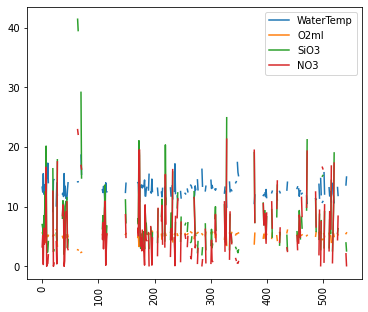

In [77]:
df.plot(x_compat=True, rot=90, figsize=(6, 5))

#### Vršimo interpolaciju kako bi popunili nedostajuće vrednosti

In [78]:
df = df.interpolate(method="polynomial", order=1, limit_direction='both')

#### Vrednosti atributa nakon interpolacije

<AxesSubplot:>

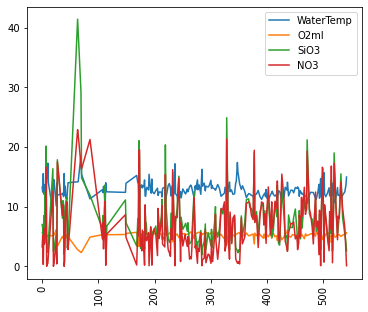

In [79]:
df.plot(x_compat=True, rot=90, figsize=(6, 5))

In [80]:
df.drop(df.tail(2).index,inplace=True)

In [81]:
df.head().append(df.tail())

,Date,WaterTemp,O2ml,SiO3,NO3
0,1969-01,13.265000,5.595000,7.00000,3.250
1,1969-02,12.435000,5.695000,6.40000,5.200
2,1969-03,15.535000,5.490000,4.00000,0.300
3,1969-04,12.070000,5.312500,8.50000,6.400
4,1969-05,12.120000,5.945000,6.00000,3.700
535,2013-08,12.053062,5.263625,7.47125,8.925
536,2013-09,12.200875,5.302750,6.75750,8.100
537,2013-10,12.348688,5.341875,6.04375,7.275
538,2013-11,12.496500,5.381000,5.33000,6.450
539,2013-12,13.062250,5.427250,4.62625,4.275


In [82]:
df.to_csv('processed_datasets/WaterTemp_O2ml.csv', index = False)